<a href="https://colab.research.google.com/github/chiranjeev9292/Technocolabs-DS-Internship/blob/main/sentimental_analysis_amazonreviews_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - Sentimental Analysis on Amazon Product Reviews

## Author Chiranjeev Sharma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df1 = pd.read_csv('/content/gdrive/My Drive/Dataset/1429_1.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/Dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df3 = pd.read_csv('/content/gdrive/My Drive/Dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
df1 = df1[['reviews.rating' , 'reviews.text']]
df1=df1.dropna()
df1.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


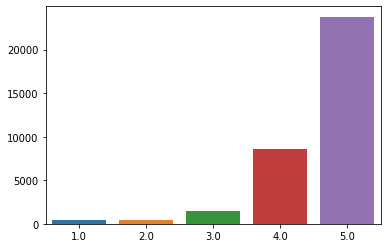

In [6]:
counts = df1['reviews.rating'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
# sns.show()

In [8]:
# df2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df2 = df2[['reviews.rating' , 'reviews.text']]
df2 = df2[df2["reviews.rating"]<=3]

# df3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df3 = df3[['reviews.rating' , 'reviews.text']]
df3 = df3[df3["reviews.rating"]<=3]

frames = [df1, df2, df3]
data = pd.concat(frames)
data = data.dropna()

In [9]:
sentiment = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}

data["sentiment"] = data["reviews.rating"].map(sentiment)


data["sentiment"] = pd.to_numeric(data["sentiment"], errors='coerce')                                    
data = data.dropna(subset=["sentiment"])
data["sentiment"]  = data["sentiment"] .astype(int)

In [11]:
import nltk
nltk.download('stopwords')
data["reviews.text"]=data["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
data["reviews.text"]=data["reviews.text"].str.lower()
words_descriptions = data["reviews.text"].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

data['cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
data['cleaned'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    product far disappoint children love use like ...
1       great beginn experienc person bought gift love
2    inexpens tablet use learn step nabi thrill lea...
3    fire hd two week love tablet great valu prime ...
4    bought grand daughter come visit set user ente...
Name: cleaned, dtype: object

In [12]:
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(data['cleaned']).toarray()
texts=pd.DataFrame(text)

In [13]:
y=data["sentiment"].values
X=pd.DataFrame(text)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [15]:
print('Train accuracy :', (lr.score(X_train, y_train))*100)
print('Test accuracy :', (lr.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(X_test)))

Train accuracy : 93.46277459328716
Test accuracy : 90.88258680095414

 CONFUSION MATRIX
[[ 324   45  148]
 [  56  207  326]
 [  29   84 6327]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       517
           1       0.62      0.35      0.45       589
           2       0.93      0.98      0.96      6440

    accuracy                           0.91      7546
   macro avg       0.78      0.65      0.70      7546
weighted avg       0.90      0.91      0.90      7546



In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
print('Train accuracy :', (nb.score(X_train, y_train))*100)
print('Test accuracy :', (nb.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy : 87.65448460952254
Test accuracy : 87.0924993373973

 CONFUSION MATRIX
[[ 129    4  384]
 [  29    7  553]
 [   2    2 6436]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.25      0.38       517
           1       0.54      0.01      0.02       589
           2       0.87      1.00      0.93      6440

    accuracy                           0.87      7546
   macro avg       0.74      0.42      0.45      7546
weighted avg       0.84      0.87      0.82      7546



In [18]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
print('Train accuracy :', (dt.score(X_train, y_train))*100)
print('Test accuracy :', (dt.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

Train accuracy : 87.93611875020709
Test accuracy : 86.46965279618341

 CONFUSION MATRIX
[[ 248   34  235]
 [  62  136  391]
 [  99  200 6141]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.61      0.48      0.54       517
           1       0.37      0.23      0.28       589
           2       0.91      0.95      0.93      6440

    accuracy                           0.86      7546
   macro avg       0.63      0.55      0.58      7546
weighted avg       0.84      0.86      0.85      7546



In [20]:
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM, Bidirectional
from keras.layers import GlobalMaxPooling1D

In [21]:
token = Tokenizer()
token.fit_on_texts(data["reviews.text"])
word_index = token.word_index
max_len = 120
X_train, X_test, y_train, y_test = train_test_split(data["reviews.text"], data["sentiment"], test_size=0.25, random_state=42)

In [22]:
X_train = token.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding = "post",truncating = "post")

X_test = token.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, padding = "post", truncating = "post")

y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

len(y_test),len(X_test),len(X_train),len(y_train)

(9432, 9432, 28295, 28295)

In [23]:
vocab_size = len(word_index)+1
embedding_dim = 16
optimizer = Adam(lr=0.0001, decay=0.0001)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim , input_length=max_len))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           225696    
_________________________________________________________________
lstm (LSTM)                  (None, 120, 150)          100200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 100)               15100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 521,899
Trainable params: 521,899
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=8)

Epoch 1/8
1769/1769 [==============================] - 539s 292ms/step - loss: 0.3399 - accuracy: 0.8499
Epoch 2/8
1769/1769 [==============================] - 520s 294ms/step - loss: 0.1941 - accuracy: 0.8899
Epoch 3/8
1769/1769 [==============================] - 521s 295ms/step - loss: 0.1743 - accuracy: 0.8933
Epoch 4/8
1769/1769 [==============================] - 528s 299ms/step - loss: 0.1598 - accuracy: 0.9046
Epoch 5/8
1769/1769 [==============================] - 527s 298ms/step - loss: 0.1566 - accuracy: 0.9049
Epoch 6/8
1769/1769 [==============================] - 528s 298ms/step - loss: 0.1440 - accuracy: 0.9135
Epoch 7/8
1769/1769 [==============================] - 523s 296ms/step - loss: 0.1386 - accuracy: 0.9186
Epoch 8/8
1769/1769 [==============================] - 522s 295ms/step - loss: 0.1338 - accuracy: 0.9241


In [25]:
result = model.evaluate(X_train, y_train)
print( 'Train accuracy :' , result[1]*100)
result = model.evaluate(X_test,y_test)
print( 'Test accuracy :' , result[1]*100)

885/885 [==============================] - 84s 93ms/step - loss: 0.1284 - accuracy: 0.9287
Train accuracy : 92.87153482437134
295/295 [==============================] - 27s 92ms/step - loss: 0.1765 - accuracy: 0.8954
Test accuracy : 89.53562378883362
